<a href="https://colab.research.google.com/github/eneaiten/Codes_MT/blob/main/5step_3min_Cosmed.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

# Carica il file senza header
file = "/content/ES_04_5step_3min_Cosmed_PLA.xlsx"
gxt_raw = pd.read_excel(file, header=None)

# Trova la riga header ("t")
start_row = gxt_raw[
    gxt_raw.apply(lambda r: r.astype(str).str.strip().str.lower() == "t").any(axis=1)
].index[0]

# Trova la colonna "t"
t_col_idx = gxt_raw.iloc[start_row].astype(str).str.strip().str.lower().eq("t").idxmax()

# Prendi solo le colonne da "t" in poi
sub_gxt = gxt_raw.iloc[start_row:, t_col_idx:].copy()

# Trova la prima riga con almeno un numero sotto l'header
def is_real_number(x):
    try:
        float(x)
        return True
    except:
        return False

numeric_start_rel = sub_gxt.iloc[1:, :].applymap(is_real_number).any(axis=1).idxmax()
numeric_start = numeric_start_rel  # indice relativo a sub_gxt

# Taglio righe iniziali non numeriche
clean_rows = sub_gxt.iloc[numeric_start:, :].copy()

# Rimuove colonne completamente vuote in fondo
# axis = 1 applica dropna alle colonne, se fosse stato axis=0 lo avrebbe fatto sulle righe
# how ='all' elimina se tutti i valori sono NaN, how ='any' elimina la colonna se almeno un valore è NaN
clean = clean_rows.dropna(axis=1, how='all')

# Imposta header dai titoli originali (start_row)
# t_col_idx + clean.shape[1] indice finale esclusivo, corrispondente al numero di colonne rimaste in clean
# shape[1] restituisce il numero di colonne di clean
headers = gxt_raw.iloc[start_row, t_col_idx:t_col_idx + clean.shape[1]].tolist()
clean.columns = headers

# Rimuove eventuali righe finali completamente vuote
clean = clean.dropna(how='all').reset_index(drop=True)

clean['time'] = (
    clean['t'].apply(lambda x: x.hour*3600 + x.minute*60 + x.second) / 60
)
# Mostra tabella pulita
display(clean)
display(clean.info())


/tmp/ipython-input-1431922280.py:27: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  numeric_start_rel = sub_gxt.iloc[1:, :].applymap(is_real_number).any(axis=1).idxmax()


,t,Rf,VT,VE,IV,VO2,VCO2,RQ,O2exp,CO2exp,...,LogVE,t Rel,mark Speed,mark Distance,Phase time,VO2/kg%Pred,BR,VT/Ti,HRR,time
0,00:00:15,30.08,1.159,34.861,1186,1.352178,1.015894,0.75,190.8125,42.7625,...,0,0,0,00:00:00,39,0,1.25,132,37.1,0.25
1,00:00:30,16.95,0.92,15.593,625,0.628078,0.479149,0.76,148.5,35.1,...,15,0,0,00:00:15,18,0,1.19,130,40.52,0.50
2,00:04:00,4.52,0.269,1.215,353,0,0.000319,0,56.3,0.3,...,210,0,0,00:03:45,0,0,0.11,117,7.62,4.00
3,00:04:30,13.26,1.106,14.662,113,0.541274,0.491915,0.91,181.3,45.85,...,30,0,0,00:04:15,16,0,0.7,114,22.75,4.50
4,00:04:45,26.85,1.114,29.904,1126,1.473306,1.023102,0.69,170.642857,47.085714,...,15,0,0,00:04:30,43,0,1.13,114,41.43,4.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,00:37:15,53.68,2.448,131.426,2465,3.523606,4.065262,1.15,430.038461,93.930769,...,15,0,0,00:37:00,102,0,4.56,57,37.1,37.25
107,00:37:30,55.78,2.409,134.382,2382,3.644986,4.000049,1.1,423.185714,89.014286,...,15,0,0,00:37:15,106,0,4.7,60,36.01,37.50
108,00:37:45,53.5,2.404,128.645,2417,3.533689,3.716834,1.05,422.071429,86.264286,...,15,0,0,00:37:30,102,0,4.58,61,35.01,37.75
109,00:38:00,52.07,2.298,119.676,2341,3.663953,3.602628,0.98,395.838461,85.892308,...,15,0,0,00:37:45,106,0,4.27,60,36.05,38.00


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111 entries, 0 to 110
Data columns (total 60 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   t               111 non-null    object 
 1   Rf              111 non-null    object 
 2   VT              111 non-null    object 
 3   VE              111 non-null    object 
 4   IV              111 non-null    object 
 5   VO2             111 non-null    object 
 6   VCO2            111 non-null    object 
 7   RQ              111 non-null    object 
 8   O2exp           111 non-null    object 
 9   CO2exp          111 non-null    object 
 10  VE/VO2          111 non-null    object 
 11  VE/VCO2         111 non-null    object 
 12  VO2/kg          111 non-null    object 
 13  METS            111 non-null    object 
 14  HR              111 non-null    object 
 15  VO2/HR          111 non-null    object 
 16  FeO2            111 non-null    object 
 17  FeCO2           111 non-null    obj

None

In [ ]:
# clean the file, we know have a new df called five_step with just the 5 step data
clean.columns = (clean.columns.str.strip().str.lower().str.replace(' ', '_')) # columns standardization, lower case + remove spaces
five_step = clean[(clean['time']>=5.1) & (clean['time']<=25.1)]
five_step.reset_index(drop=True, inplace=True) # drop: elimina il vecchio indice invece di salvarlo come colonna con nome 'index'; inplace=True: applica direttamente il nuovo indice senza creare una copia del df
display(five_step)

,t,rf,vt,ve,iv,vo2,vco2,rq,o2exp,co2exp,...,logve,t_rel,mark_speed,mark_distance,phase_time,vo2/kg%pred,br,vt/ti,hrr,time
0,00:05:15,31.73,1.61,51.061,1611,2.231115,1.738773,0.78,255.425,67.8125,...,15,0,0,00:05:00,65,0,1.89,111,40.28,5.25
1,00:05:30,34.7,1.543,53.553,1541,2.282656,1.813697,0.79,246.544444,64.744444,...,15,0,0,00:05:15,66,0,2.01,106,36.68,5.50
2,00:05:45,34.79,1.668,58.028,1664,2.642486,1.991924,0.75,261.755556,70.755556,...,15,0,0,00:05:30,77,0,2.04,100,40.49,5.75
3,00:06:00,35.23,1.73,60.947,1756,2.600286,2.053409,0.79,276.333333,72.111111,...,15,0,0,00:05:45,75,0,2.02,94,40.08,6.00
4,00:06:15,44.44,1.702,75.636,1670,2.966876,2.410065,0.81,278.518182,67.181818,...,15,0,0,00:06:00,86,0,2.6,91,38.43,6.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,00:24:00,58.44,2.013,117.635,2049,3.847302,3.656239,0.95,342.133333,78.213333,...,15,0,0,00:23:45,112,0,4.17,53,37.9,24.00
76,00:24:15,61.06,2.029,123.891,2064,3.926993,3.761648,0.96,347.333333,77.133333,...,15,0,0,00:24:00,114,0,4.3,53,37.21,24.25
77,00:24:30,58.17,1.909,111.054,1945,3.732908,3.435814,0.92,322.942857,73.564286,...,15,0,0,00:24:15,108,0,4.26,53,38.15,24.50
78,00:24:45,65.64,1.884,123.676,1909,3.771179,3.673748,0.97,324.923529,69.858823,...,15,0,0,00:24:30,109,0,4.42,54,36.48,24.75


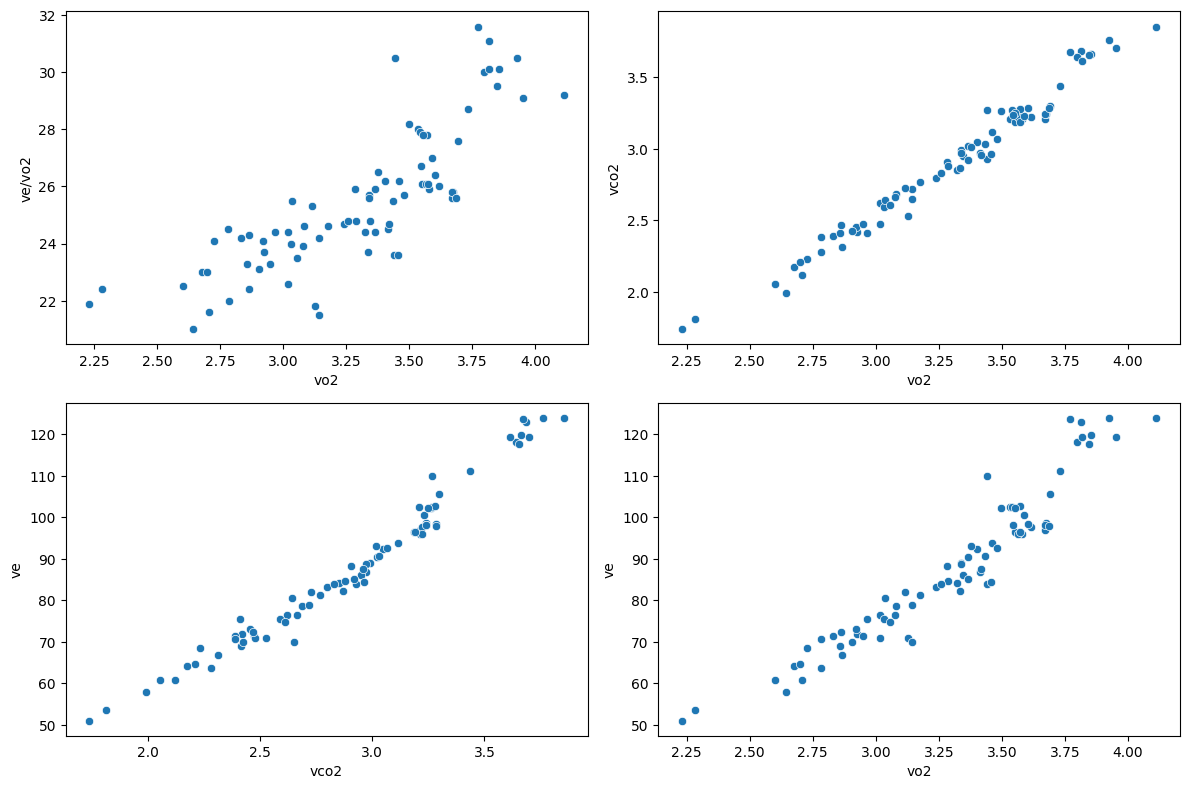

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(2,2, figsize=(12,8))
sns.scatterplot(data=five_step, x='vo2', y='ve/vo2', ax=axes[0,0])
sns.scatterplot(data=five_step, x='vo2', y='vco2', ax=axes[0,1])
sns.scatterplot(data=five_step, x='vco2', y='ve', ax=axes[1,0])
sns.scatterplot(data=five_step, x='vo2', y='ve', ax=axes[1,1])

# valori opzionali
vline_x = None      # linea verticale
hline_y = None      # linea orizzontale

# aggiungi linee solo se il valore è definito
if vline_x is not None:
    axes[0,0].axvline(x=vline_x, color='red', linestyle='--')

if hline_y is not None:
    axes[0,0].axhline(y=hline_y, color='blue', linestyle='--')


plt.tight_layout()
plt.show()


In [ ]:
# Parametri
points_per_step = 16   # es: ogni step ha 3 righe
last_points = 4        # quanti punti finali per step considerare
max_step = 5          # numero di step da analizzare (opzionale)

df = five_step.copy()     # il DataFrame già pulito

#creo il contenitore vuoto con nome last_points_rows
last_points_rows = pd.DataFrame()

for step in range(max_step): #parte da 0 e va fino a 7
    # Indici dell'inizio e della fine dello step
    start_idx = step * points_per_step
    end_idx = (step + 1) * points_per_step - 1

    # Prendi gli ultimi 'last_points' righe dello step
    # Range(start, stop) -> genera tutti i numeri da start fino a stop -1
    # list() -> trasforma in lista per poterlo usare come lista di indici da passare a df.iloc
    last_rows_idx = list(range(end_idx - last_points + 1, end_idx + 1))

    # Controlla che gli indici siano validi
    last_rows_idx = [i for i in last_rows_idx if i < len(df)]

    # Aggiungi queste righe
    # pd.concat([x, y]) -> aggiungi dataset y a x verticalmente
    last_points_rows = pd.concat([last_points_rows, df.iloc[last_rows_idx]])

# Aggiungi colonna Step
# Vogliamo assegnare a ogni riga il numero dello step a cui appartiene
# i// si chiama floor division o divisione intera, serve a capire a quale step appartiene il punto
# Esempio numerico:
#points_per_step = 3
# Indici DataFrame: 0,1,2 → step 1 → 0//3=0, 1//3=0, 2//3=0
# Indici 3,4,5 → step 2 → 3//3=1, 4//3=1, 5//3=1
# +1 per far partire la numerazione degli step da 1 invece che da 0
last_points_rows['Step'] = [i // points_per_step + 1 for i in last_points_rows.index]

display(last_points_rows)
# Calcola media per step
step_means = last_points_rows.groupby('Step')[['hr','vo2','vco2','ve', 've/vo2','ve/vco2']].mean().reset_index()
sub_step_means = step_means[['Step','hr','vo2','vco2','ve', 've/vo2','ve/vco2']]
display (sub_step_means)

,t,rf,vt,ve,iv,vo2,vco2,rq,o2exp,co2exp,...,t_rel,mark_speed,mark_distance,phase_time,vo2/kg%pred,br,vt/ti,hrr,time,Step
12,00:08:15,38.68,1.89,73.099,1880,2.920093,2.454507,0.84,306.92,78.48,...,0,0,00:08:00,85,0,2.55,88,40.28,8.25,1
13,00:08:30,40.68,1.755,71.406,1736,2.831788,2.389422,0.84,285.66,72.59,...,0,0,00:08:15,82,0,2.52,88,40.43,8.50,1
14,00:08:45,38.19,1.851,70.705,1808,2.781831,2.385735,0.86,301.69,77.18,...,0,0,00:08:30,81,0,2.56,87,40.71,8.75,1
15,00:09:00,36.61,1.887,69.096,1859,2.858004,2.4147,0.84,303.344444,81.433333,...,0,0,00:08:45,83,0,2.41,85,41.25,9.00,1
28,00:12:15,38.68,1.975,76.383,1955,3.076985,2.665951,0.87,318.5,85.9,...,0,0,00:12:00,89,0,2.66,76,41.84,12.25,2
29,00:12:30,31.31,2.232,69.879,2213,3.14313,2.651609,0.84,349.35,104.4125,...,0,0,00:12:15,91,0,2.35,76,43.52,12.50,2
30,00:12:45,41.12,1.76,72.37,1952,2.862571,2.466358,0.86,286.31,74.19,...,0,0,00:12:30,83,0,2.46,77,38.78,12.75,2
31,00:13:00,44.47,1.953,86.875,1808,3.414872,2.972637,0.87,318.172727,82.681818,...,0,0,00:12:45,99,0,3.15,76,40.99,13.00,2
44,00:16:15,44.41,1.919,85.231,1898,3.364723,2.919937,0.87,311.454545,82.236364,...,0,0,00:16:00,98,0,3.12,69,41.25,16.25,3
45,00:16:30,42.49,1.991,84.625,2049,3.28773,2.876304,0.87,324.13,84.98,...,0,0,00:16:15,95,0,2.99,68,41.02,16.50,3


,Step,hr,vo2,vco2,ve,ve/vo2,ve/vco2
0,1,133.0,2.847929,2.411091,71.0765,24.025,28.375
1,2,143.75,3.124389,2.689139,76.37675,23.55,27.375
2,3,152.0,3.381658,2.929173,85.49775,24.375,28.125
3,4,160.0,3.56139,3.1929,97.05075,26.3,29.325
4,5,166.75,3.845845,3.642972,119.50075,29.975,31.6


In [ ]:
sub_step_means.to_excel('ES04_fivestep_PLA.xlsx', index=False)